# Аналитический кейс интернет-магазина «Стримчик»

# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных

`Name` — название игры

`Platform` — платформа

`Year_of_Release` — год выпуска

`Genre` — жанр игры

`NA_sales` — продажи в Северной Америке (миллионы проданных копий)

`EU_sales` — продажи в Европе (миллионы проданных копий)

`JP_sales` — продажи в Японии (миллионы проданных копий)

`Other_sales` — продажи в других странах (миллионы проданных копий)

`Critic_Score` — оценка критиков (максимум 100)

`User_Score` — оценка пользователей (максимум 10)

`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Данные за 2016 год могут быть неполными.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

#### Шаг 1. Загрузка данных

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


По изученному датафрейму можно сказать, что в датафрейме есть пропуски и тип данных не у всех столбцов верный.

#### Шаг 2. Предобработка данных

In [5]:
#data.columns = [x.lower() for x in data.columns]
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
#data.head()
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Я заменил пропуски в столбце `user_score` потому что он был типа object, хотя это колонка с оценкой пользователей и она должна быть типа float. 

In [7]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data[data.duplicated(['name', 'platform','year_of_release'])]
data = data.drop_duplicates(['name', 'platform','year_of_release'], keep='first')

In [10]:
data[data.duplicated(['name', 'platform','year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [11]:
data = data.dropna(subset = ['name','genre','year_of_release'])
data['user_score'].replace('tbd',np.nan)
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Я обработал пропуски только в столбцах `name`,`genre`,`year_of_release`. В них было мало пропусков поэтому я просто удалил строки с пропусками. А в столбце `user_score` были значения ' tbd'. Их я заменил на nan. В остальных столбцах я оставил пропуски потому что их никак не обработать. У нас 8000+ тысяч пропусках в оценках и заполнять их средними неправильно, так как это половина значений от всего столбца. А столбец `rating` заполню позже при необходимости.

Пропуски в этих столбцах могли появиться по разным причинам. Например в колонках `name`,`genre` пропуски могли появиться из-за человечкого фактора или при передачи данных мог произойти сбой, так как в этих стобцах было всего по 2 пропуска. А в столбце `year_of_release` пропуски могли появиться из-за того, что игра выпустилась давно, но на новой платформе она только появилась и поэтому было пропущены значения.  

In [12]:
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
name : кол-во NaN 0 , процент NaN 0.0 %
-----------------

In [13]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


В итоге раздела по предобработке данных, я заменил названия столбцов, преобразовал данные в нужный тип, устранил пропуски там где это требовалось и посчитал суммарные продажи во всех регионах.

#### Шаг 3. Проведите исследовательский анализ данных

**3.1 Посмотрим, сколько игр выпускалось в разные годы.**

In [14]:
len(data['year_of_release'].unique())

37

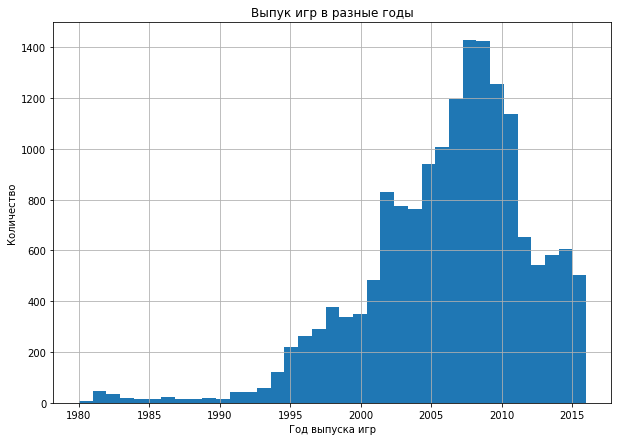

In [15]:
plt.rcParams ['figure.figsize'] = [10, 7] #задаю размер для всех графиков
data.plot(kind='hist',y='year_of_release',bins=37,legend = False,grid=True,title='Выпук игр в разные годы',);
plt.xlabel('Год выпуска игр');
plt.ylabel('Количество');

Думаю данные до 2000 года не очень важны. Так как их мало и не имеют актуальности в настоящее время. Хотя если говорить про прогноз на 2017 год, то и данные до 2013 года нас не сильно интересуют.

**3.2 Как менялись продажи по платформам и выберем платформы с наибольшими суммарными продажами и построим распределение по годам**

In [16]:
pivot = data.groupby('platform')['total_sales'].agg(sum).sort_values(ascending=False).head()
display(pivot)


platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.78
Name: total_sales, dtype: float64

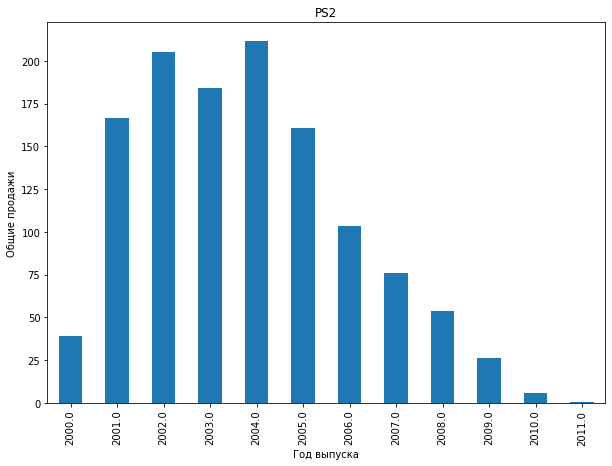

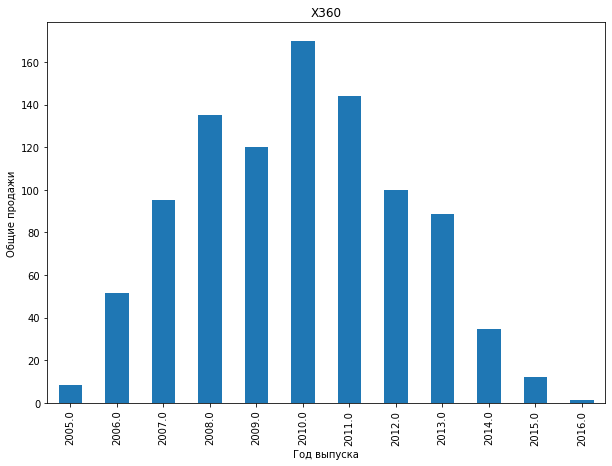

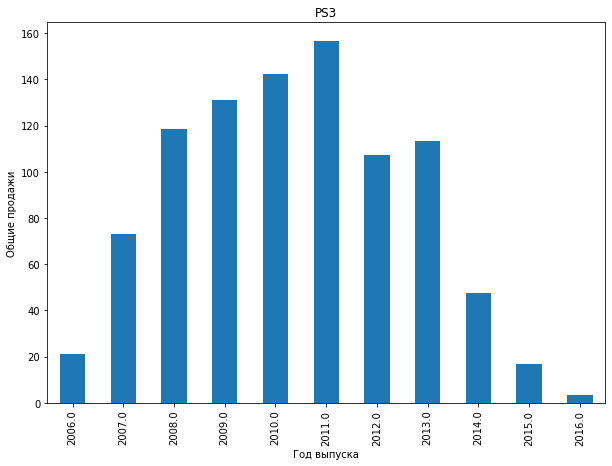

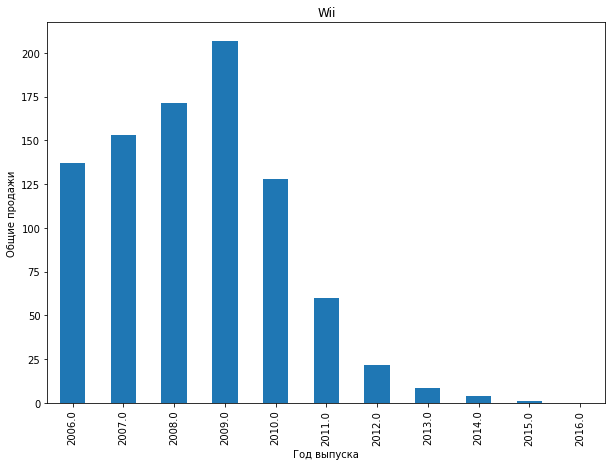

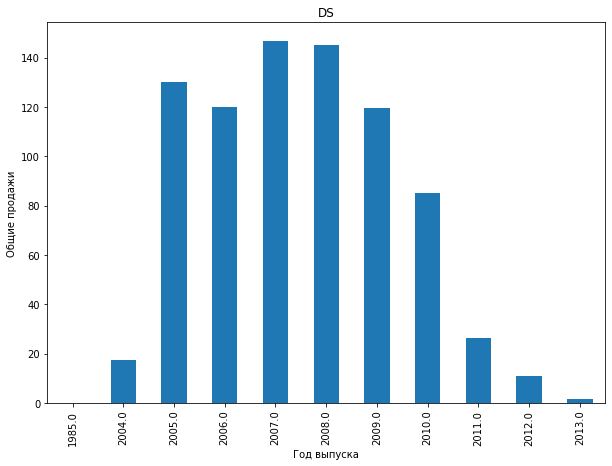

In [17]:
top_five=['PS2', 'X360','PS3' ,'Wii' ,'DS' ]
    
for i in top_five:
    data.query('platform == @i').pivot_table(index=['year_of_release'],
                                             values='total_sales', aggfunc= sum).plot.bar(title=i,xlabel='Год выпуска',
                                                                                          legend = False,ylabel='Общие продажи')

Получилось, что топ 5 платформ по продажам за все время это - ['PS2', 'X360','PS3' ,'Wii' ,'DS' ]. Каждая платформа актуальна примерно 4-6 лет, а дальше уже идет спад. Например PS2 была акутальна с 2001-2006 года, а уже с 2007 года были популярны  остальные 4 платформы. Но DS и Wii были на пике популярности до 2008-2009 года, а после уже все внимание было на X360 и PS3.

**3.3 Возьмем актуальный период**

In [18]:
data_2013 = data.query('year_of_release >=2013')
display(data_2013)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


Я взял данные от 2013 года, так как считаю, что это является актуальным периодом. Приставки прошлых времен не имеют почти актуальности после выпуска новых моделей. А в этот период у нас как раз попадают новые модели приставок. Такие как PS4 и XOne. Так же эти данные нам точно помогут построить прогноз на 2017 год, так как это последние 4 года перед 2017.

**3.4 Определим какие какие платформы лидируют по продажам**

In [19]:
pivot_2013 = data_2013.groupby('platform')['total_sales'].agg(sum).sort_values(ascending=False).head()
display(pivot_2013)

print('Лидеры по продажам:',pivot_2013.index[0],pivot_2013.index[1],pivot_2013.index[2],pivot_2013.index[3],pivot_2013.index[4])


platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
Name: total_sales, dtype: float64

Лидеры по продажам: PS4 PS3 XOne 3DS X360


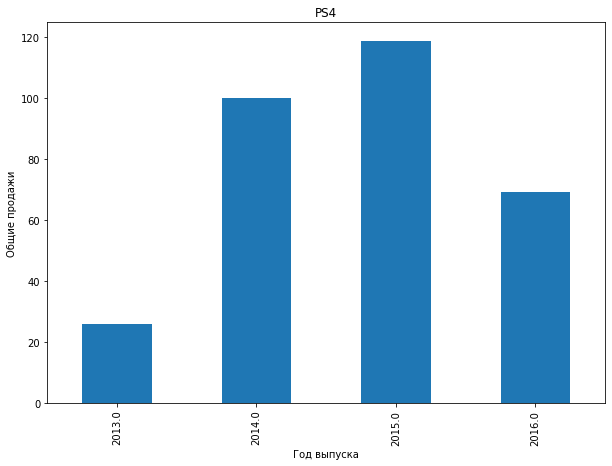

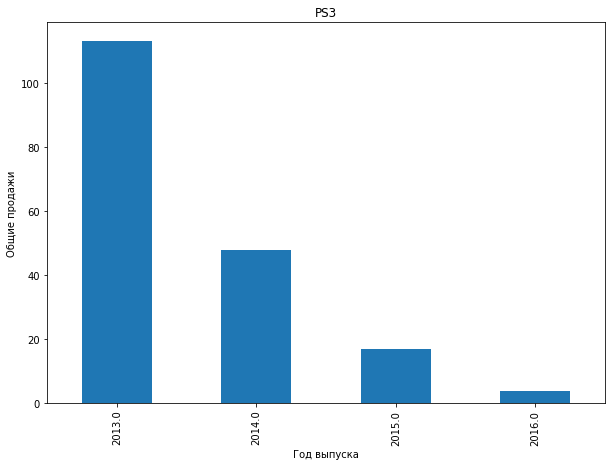

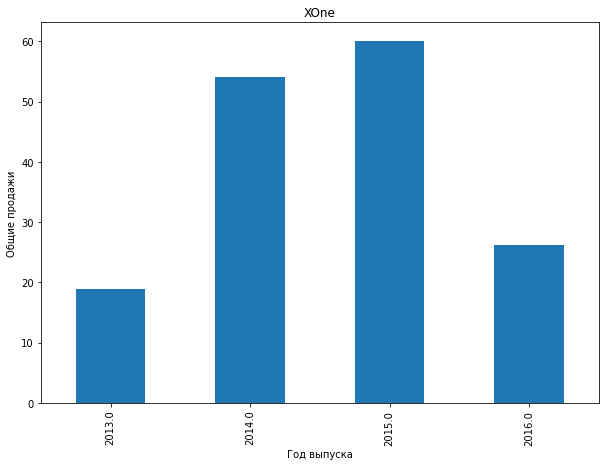

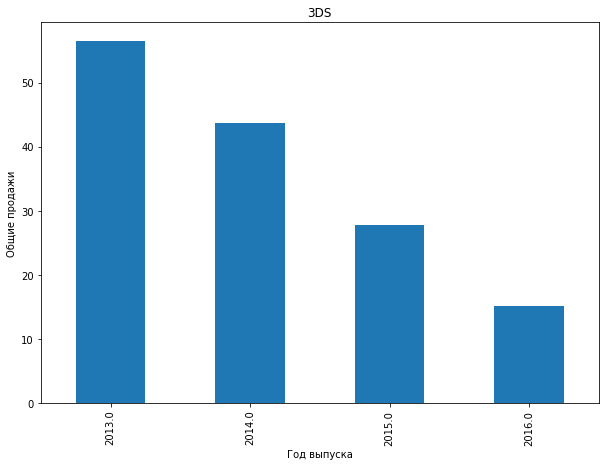

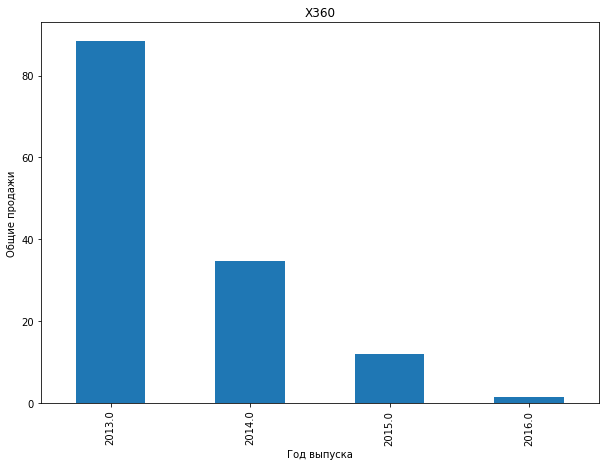

In [20]:
top_5=['PS4', 'PS3','XOne' ,'3DS' ,'X360' ]
    
for i in top_5:
    data_2013.query('platform == @i').pivot_table(index=['year_of_release'], 
                                                  values='total_sales', aggfunc= sum).plot.bar(title=i,xlabel='Год выпуска',
                                                                                          legend = False,ylabel='Общие продажи')

Потенциально прибыльными платформами выглядят: PS4, XOne. Продажи за 2016 год у нас у всех маленькие, скорее всего еще нет данных за весь год, поэтому и значения не полные. PS3, 3DS, X360 начали терять свою актуальность с 2013 года. С каждым годом продажи только уменшались. Это связано с тем, что PS4 и XOne, новые модели и их продажи с 2013 года только растут вверх.

**3.5 Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам**

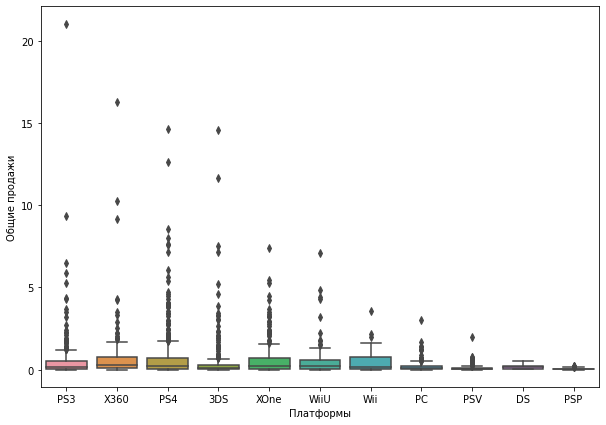

In [21]:
sns.boxplot(data=data_2013, x = 'platform', y = 'total_sales');
plt.ylabel('Общие продажи'); 
plt.xlabel('Платформы');

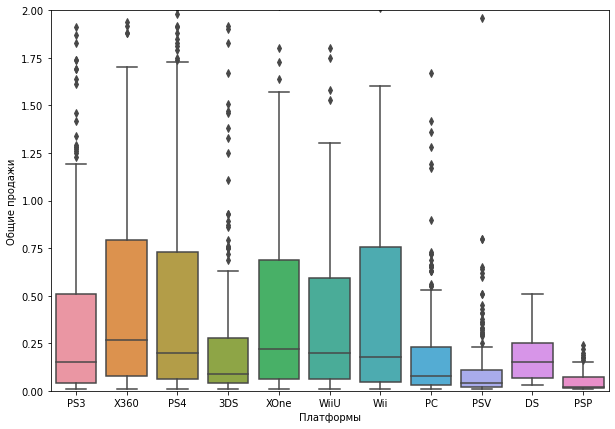

In [22]:
sns.boxplot(x="platform", y="total_sales", data=data_2013);
plt.ylim(0,2)
plt.ylabel('Общие продажи'); 
plt.xlabel('Платформы');

У нас получилось, что на каждом «ящике с усами» много выбросов. Видимо это связано с тем, что у нас много не популярных игр которые имеют маленький процент продаж. Поэтому обычные значения выходят за «ящик с усами».

**3.6 Найдем как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков**

In [23]:
display(pivot_2013)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
Name: total_sales, dtype: float64

Для этого построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами

0.40656790206178095
-0.031957110204556376


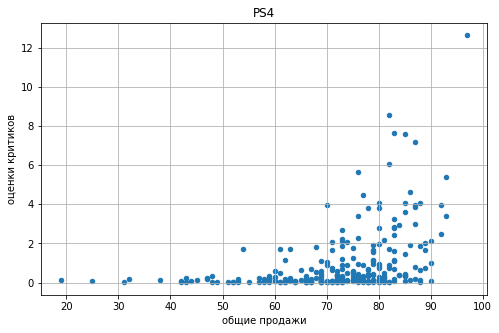

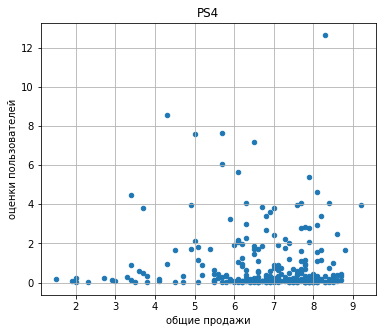

0.3342853393371919
0.0023944027357566925


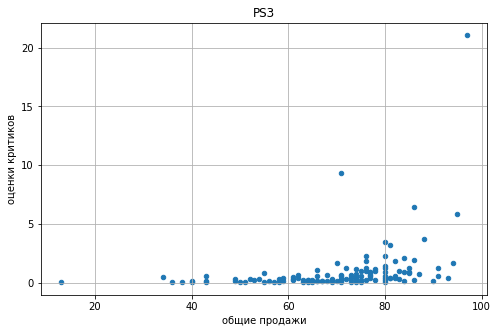

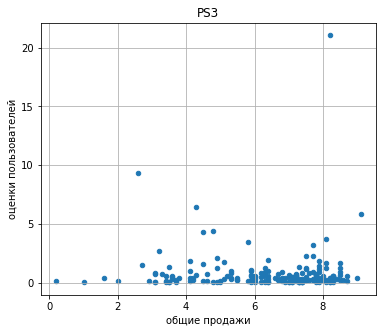

0.4169983280084017
-0.06892505328279414


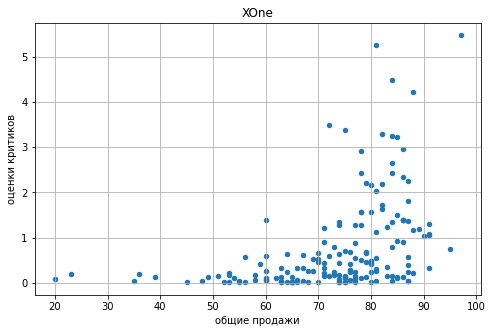

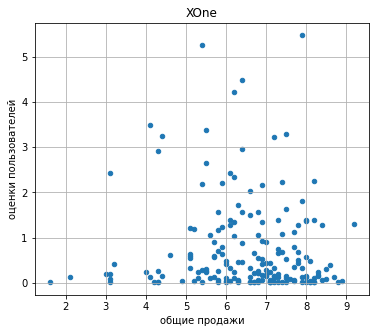

0.3570566142288103
0.24150411773563016


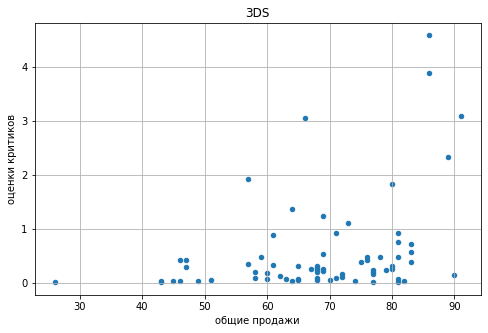

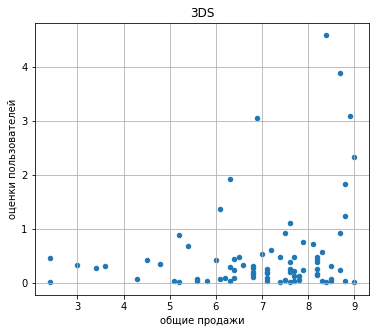

0.3503445460228664
-0.011742185147181342


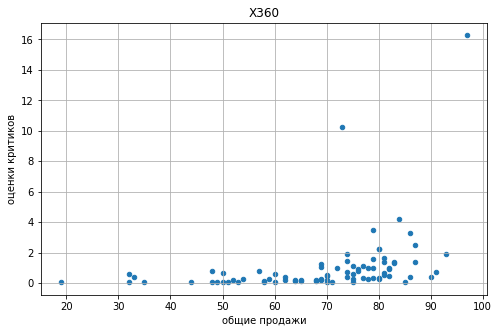

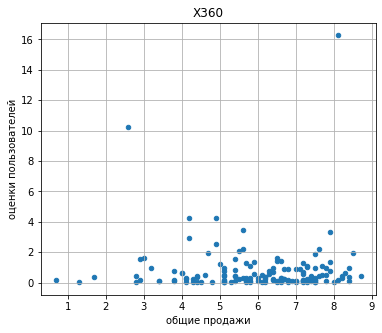

In [24]:
for i in top_5:
    data_2013.query('platform == @i').plot(x='critic_score', y='total_sales', kind='scatter', alpha=1, 
                                           figsize=(8, 5), sharex=False, grid=True,title=i,xlabel='общие продажи',
                                           ylabel='оценки критиков')
    
    print(data_2013.query('platform == @i')['critic_score'].corr(data_2013.query('platform == @i')['total_sales']))
    
    data_2013.query('platform == @i').plot(x='user_score', y='total_sales', kind='scatter', alpha=1,
                                           figsize=(6, 5), sharex=False, grid=True,title=i,xlabel='общие продажи',
                                           ylabel='оценки пользователей')

    print(data_2013.query('platform == @i')['user_score'].corr(data_2013.query('platform == @i')['total_sales']))
    plt.show()

По построенным графикам рассеивания и полученным корреляциям, можно сказать, что у нас либо корреляция ниже среднего или ее почти нет. В общем у нас не на всех платформах влияют отзывы пользователей и критиков на общие продажи. Так же сложно делать вывод по всем данным, так как повторюсь, у нас много общих продаж ~0.01. Из-за этого сложно говорить про зависимость этих значений.

**3.7 Общее распределение игр по жанрам**

genre
Action          321.87
Shooter         232.98
Sports          150.65
Role-Playing    145.89
Misc             62.82
Name: total_sales, dtype: float64

genre
Shooter         0.450
Sports          0.240
Platform        0.225
Role-Playing    0.125
Fighting        0.125
Name: total_sales, dtype: float64

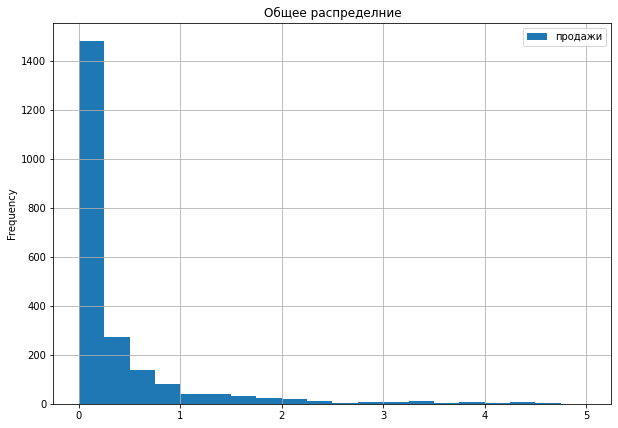

In [25]:
data_2013.plot(kind='hist',y='total_sales',bins=20,grid=True,legend=True,range = (0,5),label='продажи',ylabel='Количество',title='Общее распределние');
genre_2013 = data_2013.groupby('genre')['total_sales'].agg(sum).sort_values(ascending=False).head()
display(genre_2013)
genre_median = data_2013.groupby('genre')['total_sales'].agg('median').sort_values(ascending=False).head()
display(genre_median)
#sns.boxplot(x="genre", y="total_sales",data=genre_median)

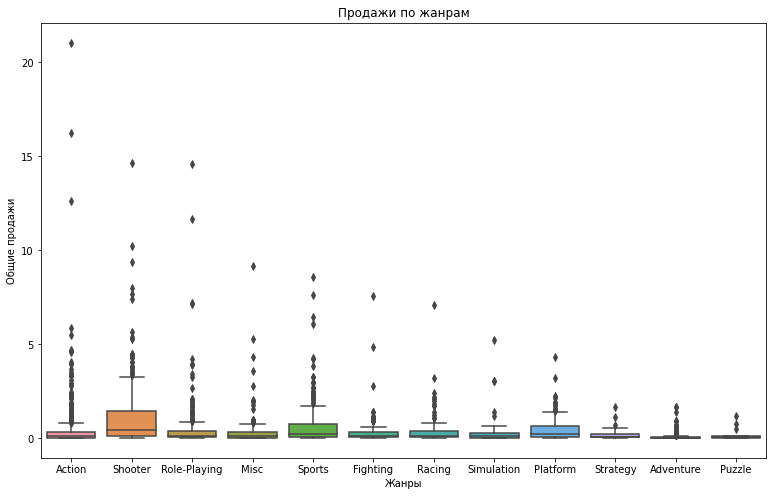

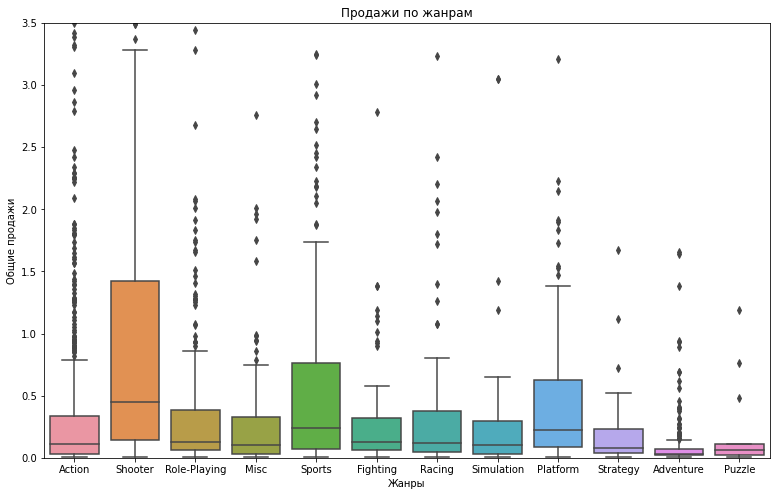

In [26]:
import seaborn as sns
data_temp, y = data_2013.copy(), 'total_sales'
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='genre')
    .set(title = 'Продажи по жанрам', xlabel = 'Жанры', ylabel = 'Общие продажи'))
plt.show()
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='genre')
    .set(title = 'Продажи по жанрам', xlabel = 'Жанры', ylabel = 'Общие продажи', ylim=(0, 3.5)))
plt.show()

По суммарным продажам у нас выделяются Action, Shooter, Sports, Role-Playing. А по медианным продажам у нас  Shooter, Sport, Platform. Поэтому с вызокими продажми у нас выделяются Shooter и Sport.

#### Шаг 4. Составьте портрет пользователя каждого региона

**4.1 Определим для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5)**

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


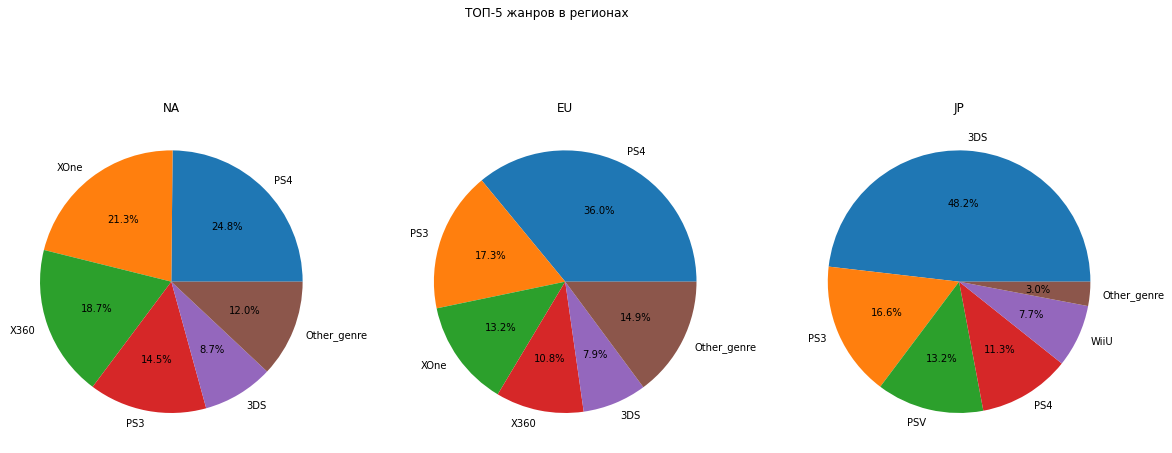

In [27]:
na_platform = data_2013.pivot_table(index='platform',values='na_sales',aggfunc=sum).sort_values(by='na_sales',
                                                                                                  ascending=False)

eu_platform = data_2013.pivot_table(index='platform',values='eu_sales',aggfunc=sum).sort_values(by='eu_sales',
                                                                                                  ascending=False)

jp_platform = data_2013.pivot_table(index='platform',values='jp_sales',aggfunc=sum).sort_values(by='jp_sales',
                                                                                                  ascending=False)

display(na_platform.head())
display(eu_platform.head())
display(jp_platform.head())   

tmp = data_2013.copy()
region = tmp.columns[4:7]
fig, axs = plt.subplots(1, 3, figsize=(20, 8))
fig.suptitle('ТОП-5 жанров в регионах')
for i in range(len(region)):
  df_i = (tmp.groupby('platform')[region[i]].sum().reset_index().
          sort_values(region[i], ascending = False, ignore_index = True)[:5])
  df_i = df_i.append({'platform': 'Other_genre', region[i]: tmp[region[i]].sum() - df_i[region[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[region[i]], labels = df_i['platform'], autopct='%1.1f%%')
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

PS4 являются самыми прибыльными в Северной Америке и Европе (108 и 141). В то время как в Японии только на 4 месте (16). А так в каждом регоине популярные платформы разные. Меньше всего продаж в Японии, а больше всего в Северной Америке. Различия в долях продаж между Северной Америкой и Европой маленькая, а вот между Северной Америкой, Европой и Японией, различия в долях продаж большая.

**4.2 Определим для пользователя каждого региона (NA, EU, JP): Самые популярные жанры (топ-5)**

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


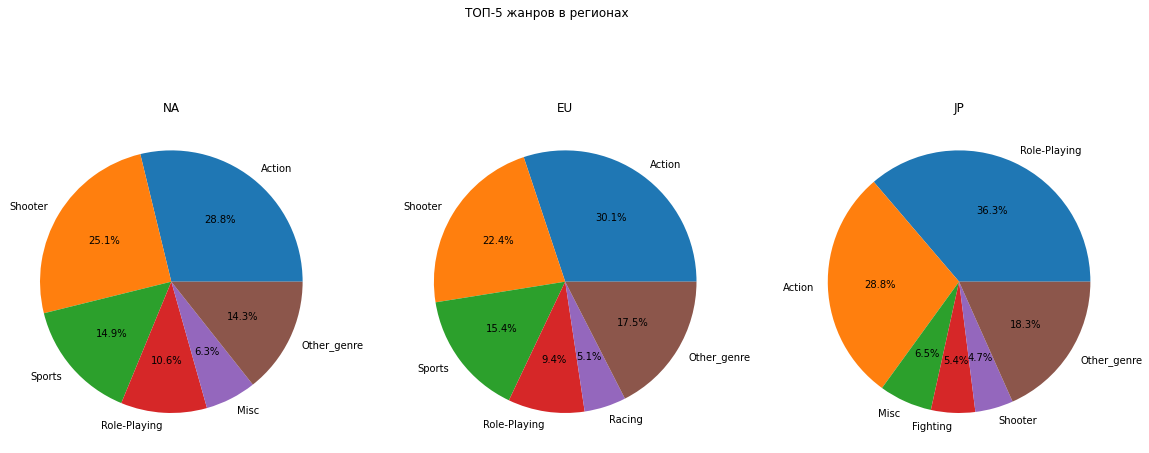

In [28]:
na_genre = data_2013.pivot_table(index='genre',values='na_sales',aggfunc=sum).sort_values(by='na_sales',
                                                                                                  ascending=False).head()

eu_genre = data_2013.pivot_table(index='genre',values='eu_sales',aggfunc=sum).sort_values(by='eu_sales',
                                                                                                  ascending=False).head()

jp_genre = data_2013.pivot_table(index='genre',values='jp_sales',aggfunc=sum).sort_values(by='jp_sales',
                                                                                                  ascending=False).head()

display(na_genre)
display(eu_genre)
display(jp_genre)

tmp = data_2013.copy()
region = tmp.columns[4:7]
fig, axs = plt.subplots(1, 3, figsize=(20, 8))
fig.suptitle('ТОП-5 жанров в регионах')
for i in range(len(region)):
  df_i = (tmp.groupby('genre')[region[i]].sum().reset_index().
          sort_values(region[i], ascending = False, ignore_index = True)[:5])
  df_i = df_i.append({'genre': 'Other_genre', region[i]: tmp[region[i]].sum() - df_i[region[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[region[i]], labels = df_i['genre'], autopct='%1.1f%%')
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

В Северной Америке и Европе самыми популярными жанрами являются Action, Shooter, Sports. В то время как в Японии это Role-Playing, Action. А Shooter и Sports не такие популярные в Японии.

**4.3 Определим для пользователя каждого региона (NA, EU, JP): Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

In [29]:
temp = data_2013.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

977 0.43752798925212716


M       369
T       333
E       302
E10+    252
Name: rating, dtype: int64

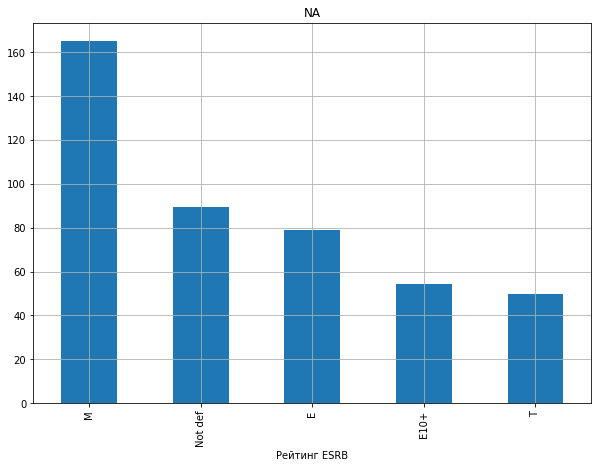

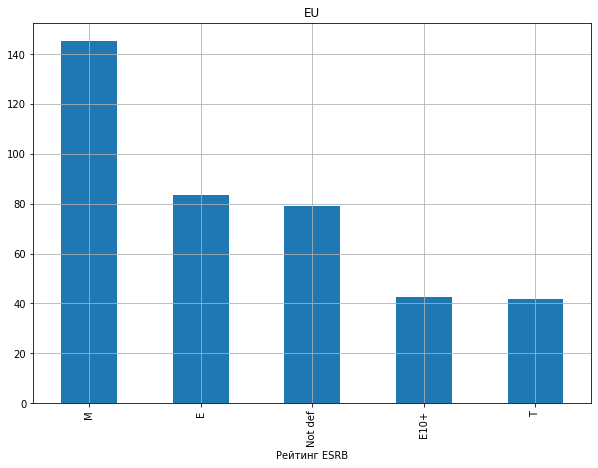

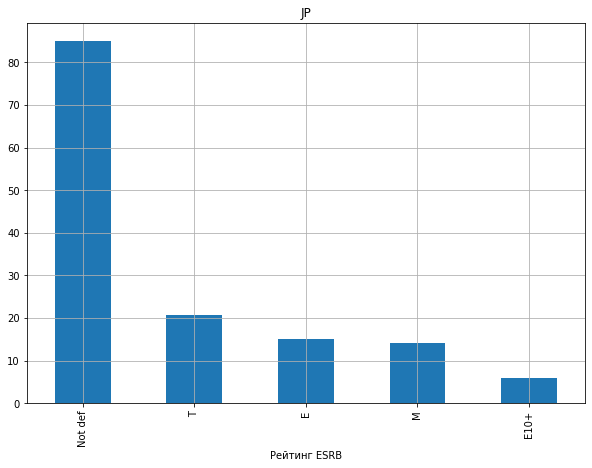

In [30]:
import warnings
warnings.filterwarnings("ignore")

data_2013['rating'] = data_2013['rating'].fillna('Not def')

data_2013.pivot_table(index='rating',values='na_sales',aggfunc=sum).sort_values(
    by='na_sales',ascending=False).plot.bar(grid=True,legend=False,xlabel='Рейтинг ESRB',title='NA');
data_2013.pivot_table(index='rating',values='eu_sales',aggfunc=sum).sort_values(
    by='eu_sales',ascending=False).plot.bar(grid=True,legend=False,xlabel='Рейтинг ESRB',title='EU');
data_2013.pivot_table(index='rating',values='jp_sales',aggfunc=sum).sort_values(
    by='jp_sales',ascending=False).plot.bar(grid=True,legend=False,xlabel='Рейтинг ESRB',title='JP');

В итоге анализа у нас получилось, что у многих игр нет рейтинга. Это потому что  рейтинг ESRB предназначен для маркировки игр для США и Канады. Поэтому большинство продаж в Японии не имеют рейтинга. В этом и заключается ключевое различие в регионах.

#### Шаг 5. Проверка гипотез

**5.1**
**Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**
 
**Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC разные.**

In [31]:
pc = data_2013[data_2013['platform'] == 'PC']['user_score'].dropna()
xone = data_2013[data_2013['platform'] == 'XOne']['user_score'].dropna()

alpha = 0.05 

results = st.ttest_ind(pc,xone,equal_var=False)

print('p-значение:', results.pvalue) 

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print('Средние пользовательские рейтинги по платформаме PC:',round(pc.mean(),1))
print('Средние пользовательские рейтинги по платформаме XOne:',round(xone.mean(),1))

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу
Средние пользовательские рейтинги по платформаме PC: 6.3
Средние пользовательские рейтинги по платформаме XOne: 6.5


Я сформировал нулевую гипотезу о том, что нам надо было проверить средние пользовательские рейтинги платформ Xbox One и PC одинаковые. И уже оталкиваясь от нее сформировал альтернативную гипотезу о том что средние пользовательские рейтинги платформ Xbox One и PC разные. В итоге проверки получилось, что мы не отвергаем нулевую гипотезу и средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**5.2**
**Нулевая гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.**
 
**Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

In [32]:
actions = data_2013[data_2013['genre'] == 'Action']['user_score'].dropna() 
sports = data_2013[data_2013['genre'] == 'Sports']['user_score'].dropna()

alpha = 0.05 

results = st.ttest_ind(actions,sports,equal_var=False)

print('p-значение:', results.pvalue) 

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    

print('Средние пользовательские рейтинги по жанру Action:',round(actions.mean(),1))   
print('Средние пользовательские рейтинги по жанру Sports:',round(sports.mean(),1))

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу
Средние пользовательские рейтинги по жанру Action: 6.8
Средние пользовательские рейтинги по жанру Sports: 5.2


В этой проверке я сформировал аналогичную нулевую гипотезу и о равенстве двух средних. И от нее сформулировал альтернативную гипотезу о разности средних двух. И в итоге получил, что мы отвергаем нулевую гипотезу о равенстве и средние пользовательские рейтинги жанров Action и Sports разные.

Для тестирования гипотез я использовал двусторонний t-тест. Потому что он сравнивает два средних значения, и сообщает нам, отличаются они друг от друга или нет. Так же я использовал t-критерий Стюдента, потому что это статистический тест, который используется для проверки равенства средних значений в двух выборок. Что я и делал. 

# Вывод

В данном проекте я исследовал из открытых источников доступные исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). И выявлял определяющие успешность игры закономерности. В итоге это должно позволить сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Сначал я ознакомился с данными и изучил общую информацию. Затем я подготавливал данные для работы: заменил названия столбцов, преобразовал данные в нужные типы и обработал пропуски в некоторых стобцах. Так же создал новый столбец с суммарными продажами во всех регионах.

Затем я провел исследовательский анализ данных. Посмотрел как менялись продажи по платформам и выявил, что нужно выделить актуальный период для прогноза на 2017 год. Я выбрал период с 2013-2016 год. И тоже посмотрел как менялись продажи по платформам, но уже с 2013 года. Потенциально прибыльными платформами выглядят: PS4, XOne. Продажи за 2016 год у нас у всех маленькие, скорее всего еще нет данных за весь год, поэтому и значения не полные. PS3, 3DS, X360 начали терять свою актуальность с 2013 года. С каждым годом продажи только уменшались. Затем я посмотрел как влияют на продажи, отзывы пользователей и критиков. Получилось, что у нас либо корреляция ниже среднего или ее почти нет. В общем у нас не на всех платформах влияют отзывы пользователей и критиков на общие продажи. Так же сложно делать вывод по всем данным, так как повторюсь, у нас много общих продаж ~0.01. Из-за этого сложно говорить про зависимость этих значений. И в конце я посмотрел на на общее распределение игр по жанрам. Оказалось, что самые выделающиеся жанры это Action, Shooter, Sports.

Дальше я составлял портрет пользователя каждого региона.Получилось, что в каждом регоине популярные платформы разные. Меньше всего продаж в Японии, а больше всего в Северной Америке. Различия в долях продаж между Северной Америкой и Европой маленькая, а вот между Северной Америкой, Европой и Японией, различия в долях продаж большая. По жанрам в Северной Америке и Европе самыми популярными жанрами являются Action, Shooter, Sports. В то время как в Японии это Role-Playing, Action. А Shooter и Sports не такие популярные в Японии. А рейтинг от организации ESRB влияют только на продажи в Японии.

В конце работы я проверял 2 гипотезы.

Первая была о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. В итоге проверки мы подтвердили эту гипотезу.

Вторая была о том, что средние пользовательские рейтинги жанров Action и Sports разные. И эту гипотезу, в результате проверки, мы тоже подтвердили.

Лучше всего будет потратить рекламный бюджет на платформы PS4 и XOne, на игры жанра Action и Shooter с рейтингом "M" в регионах Северной Америки и Европе.